<a href="https://colab.research.google.com/github/williammcintosh/machine_learning_projects/blob/main/Naive_Bayes_Spam_Fitlering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Program 2

## Will McIntosh

# Import Data

In [146]:
import pandas as pd
import numpy as np
import sys, os

In [147]:
if os.path.isfile("/content/spambasedata.csv") == False:
  !gdown --id 1chSjCneNjtQ-xfwtyYQ_ntt5BRGcAwpc

In [148]:
df = pd.read_csv("/content/spambasedata.csv", header=None)

# Examine Data

In [149]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


# Test a +1 To each Value

In [150]:
df += 1

In [151]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,1.00,1.64,1.64,1.0,1.32,1.00,1.00,1.00,1.00,1.00,...,1.00,1.000,1.0,1.778,1.000,1.000,4.756,62,279,2
1,1.21,1.28,1.50,1.0,1.14,1.28,1.21,1.07,1.00,1.94,...,1.00,1.132,1.0,1.372,1.180,1.048,6.114,102,1029,2
2,1.06,1.00,1.71,1.0,2.23,1.19,1.19,1.12,1.64,1.25,...,1.01,1.143,1.0,1.276,1.184,1.010,10.821,486,2260,2
3,1.00,1.00,1.00,1.0,1.63,1.00,1.31,1.63,1.31,1.63,...,1.00,1.137,1.0,1.137,1.000,1.000,4.537,41,192,2
4,1.00,1.00,1.00,1.0,1.63,1.00,1.31,1.63,1.31,1.63,...,1.00,1.135,1.0,1.135,1.000,1.000,4.537,41,192,2


In [152]:
df.shape

(4601, 58)

# Test Scaling

In [153]:
import pandas as pd
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

# Test-Train Split

Splitting right down the center as per the program instructions.

In [154]:
from sklearn.model_selection import train_test_split

X = df.drop(57, axis=1)
y = df[57]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.50, random_state=1)

In [155]:
print(y_train.shape)
print(X_train.shape)

(2300,)
(2300, 57)


In [156]:
print(f"Original Dataset Percent Spam =\t\t{round(df[df[57] == 1].shape[0] / df.shape[0], 3)}")
print(f"Original Dataset Percent Not Spam =\t{round(df[df[57] == 0].shape[0] / df.shape[0], 3)}")

Original Dataset Percent Spam =		0.394
Original Dataset Percent Not Spam =	0.606


# Construct the Bayesian Model

## Compute the Prior Probability

Compute the prior probability for each class 1 (Spam) and 0 (Not-Spam) in the training data.

In [157]:
totalTrain = pd.concat([X_train, y_train], axis=1)

df1 = totalTrain[totalTrain[57] == 1]
df0 = totalTrain[totalTrain[57] == 0]

print(df1.shape)
print(df0.shape)

p1 = df1.shape[0] / totalTrain.shape[0]
p0 = df0.shape[0] / totalTrain.shape[0]

print(f"Probability Prior of Spam\tfor the Training Set is {round(p1,4)}")
print(f"Probability Prior of Not Spam\tfor the Training Set is {round(p0,4)}")

(906, 58)
(1394, 58)
Probability Prior of Spam	for the Training Set is 0.3939
Probability Prior of Not Spam	for the Training Set is 0.6061


## Get $\mu$ and $\sigma$

For each of the 57 features, compute the mean and standard deviation in the training set of the values given each class.

Each column represents the mean and standard deviation of each feature for each class. Each row represents a feature from the original dataset.

In [158]:
f_stats = {
  "Class1_mu":[],
  "Class1_sd":[],
  "Class0_mu":[],
  "Class0_sd":[]  
}

for i in range(0,df1.shape[1]-1):
  f_stats['Class1_mu'].append(np.mean(df1[i]))
  f_stats['Class1_sd'].append(np.std(df1[i]))
  f_stats['Class0_mu'].append(np.mean(df0[i]))
  f_stats['Class0_sd'].append(np.std(df0[i]))

prob_df = pd.DataFrame(f_stats)
print(f"\nSize of the matrix is: {prob_df.shape}\n")
prob_df.head()


Size of the matrix is: (57, 4)



,Class1_mu,Class1_sd,Class0_mu,Class0_sd
0,0.034540,0.072303,0.014798,0.056746
1,0.011490,0.025651,0.015759,0.110970
2,0.076464,0.090226,0.038002,0.094825
3,0.005075,0.062455,0.000039,0.000699
4,0.053234,0.076190,0.019298,0.067963


## Convert $0$ valued $\sigma$ to $0.0001$

Any values in that have a 0 for the $\sigma$ standard deviation are converted to $0.0001$. As to prevent a divide by zero error, as per the assignment.

In [159]:
prob_df[(prob_df['Class1_sd'] == 0) | (prob_df['Class0_sd'] == 0)]

,Class1_mu,Class1_sd,Class0_mu,Class0_sd
40,0.0,0.0,0.010239,0.061119


In [160]:
prob_df.replace({'Class1_sd': 0, 'Class0_sd': 0}, 0.0000001, inplace=True)

prob_df[(prob_df['Class1_sd'] == 0) | (prob_df['Class0_sd'] == 0)]

,Class1_mu,Class1_sd,Class0_mu,Class0_sd


## Predict a new datapoint

This function takes in a datapoint from the test dataset and will classify it as either spam or not.


\begin{equation*}
class_{NB}(X) = argmax
\left(
  log
  \left(
    P(class) \prod_{i} P(x_i|class)
  \right)
\right)
\end{equation*}

We distribute the $log$ into the multiplication, changing the product to a sum as per logarithmic properties.

\begin{equation*}
class_{NB}(X) = argmax
\left(
  log
  \left(
    P(class)
  \right)
  + log \left(
    \sum_{i} P(x_i|class)
  \right)
\right)
\end{equation*}

$P(class)$

* The prior probability of that given class.

$P(x_i|class)=N(x_i;\mu_{i,class},\sigma_{i,class})$

* The conditional probability of $x$ given the class.

$N(x_i;\mu_{i,class},\sigma_{i,class})$

* The normal distribution
* $x_i$ represents each component of $x$
* $\mu_{i,class}$ is the mean of that index of $i$ in our training dataset, for the given class
* $\sigma_{i,class}$ is the standard deviation of that index $i$ in our training dataset, for the given class

$\prod_{i}$

* Each normal valued index is multiplied together

We get the $log$ of the resulting values to avoid underflow.


Then, we even further distribute the $log$ into the normal distribution function $N(x_i;\mu_{i,class},\sigma_{i,class})$ changing that product into a summation in the normal function : 


\begin{equation*}
class_{NB}(X) = argmax
\left(
  log
  \left(
    P(class)
  \right)
  +
  \sum_{i} log
  \left(
    \frac{1}{\sqrt{2\pi}\sigma}
  \right)
  -\frac{(x-\mu)^2}{2\sigma^2}
\right)
\end{equation*}

The log of 1 is 1, so the equation gets even further gets simplified to:

\begin{equation*}
class_{NB}(X) = argmax
\left(
  log
  \left(
    P(class)
  \right)
  -
  \sum_{i} log
  \left(
    \sqrt{2\pi}\sigma
  \right)
  +
  \frac{(x-\mu)^2}{2\sigma^2}
\right)
\end{equation*}

In [161]:
def Norm(mu, sd, x):
  E = (((x-mu)**2.0)) / (2.0*(sd**2.0))
  N = np.log(np.sqrt(2.0*np.pi)*sd) + E
  return N

# Convert the dataframe above into a numpy array for quick indexing
probs = np.array(prob_df)

def BayesianClassifer(X):
  # Get the log of each prior
  pX_class1 = np.log(p1)
  pX_class0 = np.log(p0)

  # Allows us to take vectors as our arguments
  norm = np.vectorize(Norm)
  pX_class1 -= np.sum(norm(probs[:,0], probs[:,1], X))
  pX_class0 -= np.sum(norm(probs[:,2], probs[:,3], X))

  return 1 if pX_class1 > pX_class0 else 0

# Testing with the first element in the Test dataset
pred = BayesianClassifer(X_test.iloc[0])
pred

1

# Testing the Bayesian Model

In [162]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

def PrintSuccessMetrics(title, Y_test, Y_pred):
  main_title = title + " Success Metrics"
  print("")
  print(main_title)
  print(f"_"*len(main_title))
  print(f'Test accuracy:\t\t', round(accuracy_score(Y_test, Y_pred), 4))
  print(f'Test precision:\t\t', round(precision_score(Y_test, Y_pred, average='weighted'), 4))
  print(f'Test recall:\t\t', round(recall_score(Y_test, Y_pred, average='weighted'), 4))
  print(f'Test F1:\t\t', round(f1_score(Y_test, Y_pred, average='micro'), 4))
  print("")

In [163]:
import time

start_time = time.time()

correctCount = 0

# Initializes the predicted values dataframe
y_pred = np.zeros(y_test.shape)

# Need to convert to a Numpy array for indexing and iterating
X_test = np.array(X_test)
y_test = np.array(y_test)

for i, X in enumerate(X_test):
  y_pred[i] = BayesianClassifer(X)

PrintSuccessMetrics("Naive Bayes Classifier", y_test, y_pred)

print("--- %s seconds ---" % (time.time() - start_time))


Naive Bayes Classifier Success Metrics
______________________________________
Test accuracy:		 0.8083
Test precision:		 0.8502
Test recall:		 0.8083
Test F1:		 0.8083

--- 1.7944622039794922 seconds ---


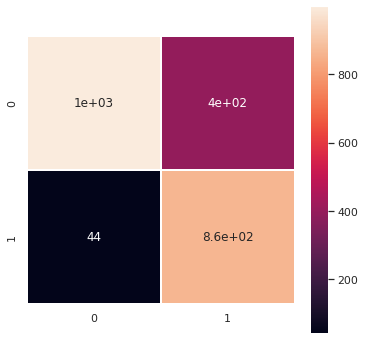

In [164]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.set(rc = {'figure.figsize':(6,6)})  #Edits size of chart
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, linewidths=1, square=True)